The program generates a synthetic dataset, introduces outliers, fits linear regression models with and without the outliers, and visualizes the results. It also provides model summaries to quantitatively observe the impact of outliers on the regression coefficients.

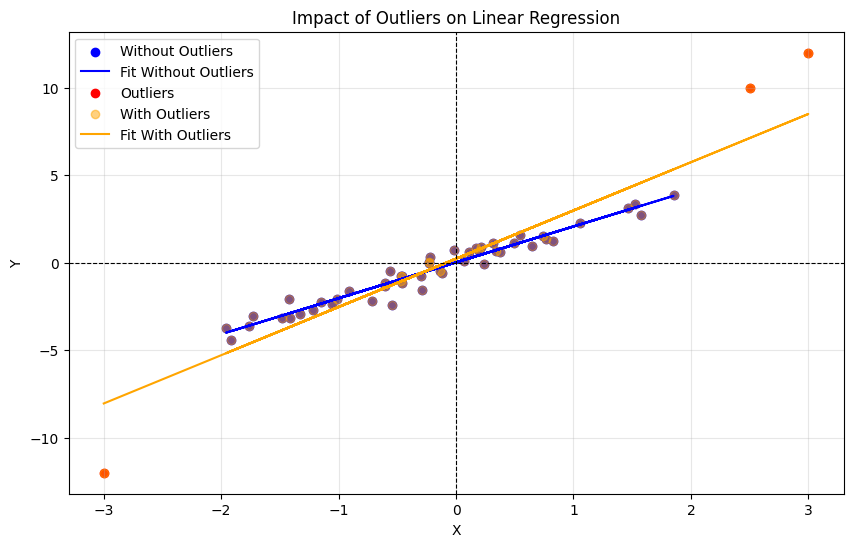

Model Without Outliers:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     932.8
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.18e-33
Time:                        09:21:44   Log-Likelihood:                -28.765
No. Observations:                  50   AIC:                             61.53
Df Residuals:                      48   BIC:                             65.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0205      

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
np.random.seed(42)

# Generate 50 points for the main dataset
x = np.random.normal(0, 1, 50)
y = 2 * x + np.random.normal(0, 0.5, 50)

# Introduce outliers
x_outliers = np.array([2.5, 3, -3])
y_outliers = np.array([10, 12, -12])

# Combine the main dataset with the outliers
x_combined = np.concatenate([x, x_outliers])
y_combined = np.concatenate([y, y_outliers])

# Step 2: Fit linear regression models
# Without outliers
x_no_outliers = sm.add_constant(x)
model_no_outliers = sm.OLS(y, x_no_outliers).fit()

# With outliers
x_with_outliers = sm.add_constant(x_combined)
model_with_outliers = sm.OLS(y_combined, x_with_outliers).fit()

# Step 3: Visualize the impact of outliers
plt.figure(figsize=(10, 6))

# Plot without outliers
plt.scatter(x, y, label="Without Outliers", color="blue")
plt.plot(
    x, model_no_outliers.predict(x_no_outliers), label="Fit Without Outliers", color="blue"
)

# Plot with outliers
plt.scatter(x_outliers, y_outliers, label="Outliers", color="red")
plt.scatter(x_combined, y_combined, label="With Outliers", color="orange", alpha=0.5)
plt.plot(
    x_combined, model_with_outliers.predict(x_with_outliers), label="Fit With Outliers", color="orange"
)

# Customize plot
plt.title("Impact of Outliers on Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# Step 4: Print summary of both models
print("Model Without Outliers:\n")
print(model_no_outliers.summary())

print("\nModel With Outliers:\n")
print(model_with_outliers.summary())